In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as mysql

In [2]:
df=pd.read_csv("C:\\Users\\santh\\Downloads\\train-2.csv")

In [3]:
mydb=mysql.connect(host="localhost",user="root",
                  password="Sandy@123",auth_plugin="mysql_native_password")

In [4]:
mycursor=mydb.cursor()

In [5]:
mycursor.execute("use Flightprice")

In [6]:
df.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,None,NaN,Clear,181,None,1.09,804.35


In [7]:
df.shape

(45000, 19)

In [8]:
df.columns

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Departure_Time', 'Arrival_Time', 'Duration', 'Aircraft_Type',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price', 'Flight_Price'],
      dtype='object')

In [9]:
df.columns=[x.lower() for x in df.columns]

In [10]:
df.columns

Index(['flight_id', 'airline', 'departure_city', 'arrival_city', 'distance',
       'departure_time', 'arrival_time', 'duration', 'aircraft_type',
       'number_of_stops', 'day_of_week', 'month_of_travel', 'holiday_season',
       'demand', 'weather_conditions', 'passenger_count', 'promotion_type',
       'fuel_price', 'flight_price'],
      dtype='object')

In [11]:
df.isnull().sum()

flight_id                0
airline               3573
departure_city         340
arrival_city           186
distance                91
departure_time           0
arrival_time             0
duration                 0
aircraft_type           43
number_of_stops          0
day_of_week            225
month_of_travel        267
holiday_season           0
demand                 317
weather_conditions     302
passenger_count          0
promotion_type         403
fuel_price              90
flight_price             0
dtype: int64

#  Imputing Missing Values

In [12]:
df['airline']=df['airline'].fillna(df['airline'].mode()[0])
df["departure_city"]=df["departure_city"].fillna(df["departure_city"].mode()[0])
df["arrival_city"]=df['arrival_city'].fillna(df['arrival_city'].mode()[0])
df['distance']=df["distance"].fillna(df["distance"].median())
df["aircraft_type"]=df['aircraft_type'].fillna(df['aircraft_type'].mode()[0])
df['day_of_week']=df['day_of_week'].fillna(df["day_of_week"].mode()[0])
df["month_of_travel"]=df["month_of_travel"].fillna(df["month_of_travel"].mode()[0])
df["demand"]=df["demand"].fillna(df["demand"].fillna(df["demand"]).mode()[0])
df["weather_conditions"]=df["weather_conditions"].fillna(df["weather_conditions"].mode()[0])
df["promotion_type"]=df["promotion_type"].fillna(df["promotion_type"].mode()[0])
df["fuel_price"]=df["fuel_price"].fillna(df["fuel_price"].median())

In [13]:
df.isnull().sum()

flight_id             0
airline               0
departure_city        0
arrival_city          0
distance              0
departure_time        0
arrival_time          0
duration              0
aircraft_type         0
number_of_stops       0
day_of_week           0
month_of_travel       0
holiday_season        0
demand                0
weather_conditions    0
passenger_count       0
promotion_type        0
fuel_price            0
flight_price          0
dtype: int64

In [14]:
df.dtypes

flight_id              object
airline                object
departure_city         object
arrival_city           object
distance              float64
departure_time         object
arrival_time           object
duration              float64
aircraft_type          object
number_of_stops         int64
day_of_week            object
month_of_travel        object
holiday_season         object
demand                 object
weather_conditions     object
passenger_count         int64
promotion_type         object
fuel_price            float64
flight_price          float64
dtype: object

In [15]:
df.head()

,flight_id,airline,departure_city,arrival_city,distance,departure_time,arrival_time,duration,aircraft_type,number_of_stops,day_of_week,month_of_travel,holiday_season,demand,weather_conditions,passenger_count,promotion_type,fuel_price,flight_price
0,F1,Airline B,Port Michael,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,F4,Airline A,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35


In [16]:
df=df.drop_duplicates(subset=["flight_id"])

In [17]:
df.shape

(45000, 19)

In [18]:
df.flight_id.value_counts()

F1        1
F30004    1
F29996    1
F29997    1
F29998    1
         ..
F15002    1
F15003    1
F15004    1
F15005    1
F45000    1
Name: flight_id, Length: 45000, dtype: int64

In [19]:
df.airline.value_counts()

Airline A    17436
Airline C    13809
Airline B    13755
Name: airline, dtype: int64

In [20]:
df.departure_city.value_counts()

Port Michael         389
West Michael          47
North Michael         42
South Michael         40
North David           39
                    ... 
New Jordanchester      1
North Morgan           1
North Mindy            1
Mcmillanberg           1
East Patriciafurt      1
Name: departure_city, Length: 23187, dtype: int64

In [21]:
df.arrival_city.value_counts()

North Michael       235
Port Michael         47
Lake Michael         42
New Michael          35
Michaelmouth         35
                   ... 
Summerland            1
North Lindafurt       1
West Waynetown        1
North Keithmouth      1
Gabrielville          1
Name: arrival_city, Length: 23479, dtype: int64

In [22]:
df.aircraft_type.value_counts()

Airbus A320    9154
Boeing 777     9059
Boeing 787     8952
Airbus A380    8943
Boeing 737     8892
Name: aircraft_type, dtype: int64

In [23]:
df.day_of_week.value_counts()

Sunday       6697
Saturday     6418
Friday       6414
Monday       6407
Wednesday    6406
Tuesday      6336
Thursday     6322
Name: day_of_week, dtype: int64

In [24]:
df.month_of_travel.value_counts()

January      4110
October      3812
April        3776
July         3755
November     3749
September    3731
March        3727
August       3712
December     3700
June         3672
May          3658
February     3598
Name: month_of_travel, dtype: int64

In [25]:
df.holiday_season.value_counts()

Spring    9036
None      9020
Fall      9010
Summer    8970
Winter    8964
Name: holiday_season, dtype: int64

In [26]:
df.weather_conditions.value_counts()

Cloudy    11711
Snow      11148
Rain      11093
Clear     11048
Name: weather_conditions, dtype: int64

In [27]:
df.promotion_type.value_counts()

Special Offer    15299
Discount         14889
None             14812
Name: promotion_type, dtype: int64

In [28]:
df.head()

,flight_id,airline,departure_city,arrival_city,distance,departure_time,arrival_time,duration,aircraft_type,number_of_stops,day_of_week,month_of_travel,holiday_season,demand,weather_conditions,passenger_count,promotion_type,fuel_price,flight_price
0,F1,Airline B,Port Michael,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,F4,Airline A,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35


In [29]:
df.shape

(45000, 19)

In [30]:
c='''create table if not exists price_data(flight_id varchar(50),airline varchar(255),departure_city varchar(255),
arrival_city varchar(255),distance float,departure_time varchar(255),arrival_time varchar(50),duration float,aircraft_type varchar(255),
number_of_stops int,day_of_week varchar(255),month_of_travel varchar(255),holiday_season varchar(255),demand varchar(255),
weather_conditions varchar(255),passenger_count int,promotion_type varchar(255),fuel_price float,flight_price float)'''
mycursor.execute(c)
print("sucessfully")

sucessfully


In [31]:
for index,row in df.iterrows():
    query='''insert into Flightprice.price_data(flight_id,airline,departure_city,arrival_city,distance,departure_time,arrival_time,duration,
    aircraft_type,number_of_stops,day_of_week,month_of_travel,holiday_season,demand,weather_conditions,passenger_count,promotion_type,
    fuel_price,flight_price)values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'''
    mycursor.execute(query,(row.flight_id,row.airline,row.departure_city,
                            row.arrival_city,row.distance,row.departure_time,row.arrival_time,row.duration,row.aircraft_type,row.number_of_stops,
                           row.day_of_week,row.month_of_travel,row.holiday_season,row.demand,row.weather_conditions,
                           row.passenger_count,row.promotion_type,row.fuel_price,row.flight_price))

In [32]:
#mycursor.execute("drop table Flightprice.price_data")

In [33]:
mydb.commit()

In [34]:
mydb=mysql.connect(host="localhost",user="root",
                  password="Sandy@123",auth_plugin="mysql_native_password")

In [35]:
mycursor=mydb.cursor()

In [36]:
mycursor.execute("use Flightprice")

In [37]:
mycursor.execute("select * from price_data")

In [38]:
data=mycursor.fetchall()

In [39]:
#mycursor.execute("drop table price_data")

In [40]:
columns=df.columns

In [41]:
df=pd.DataFrame(data,columns=columns)

Text(0.5, 1.0, 'month_of_travel according to price')

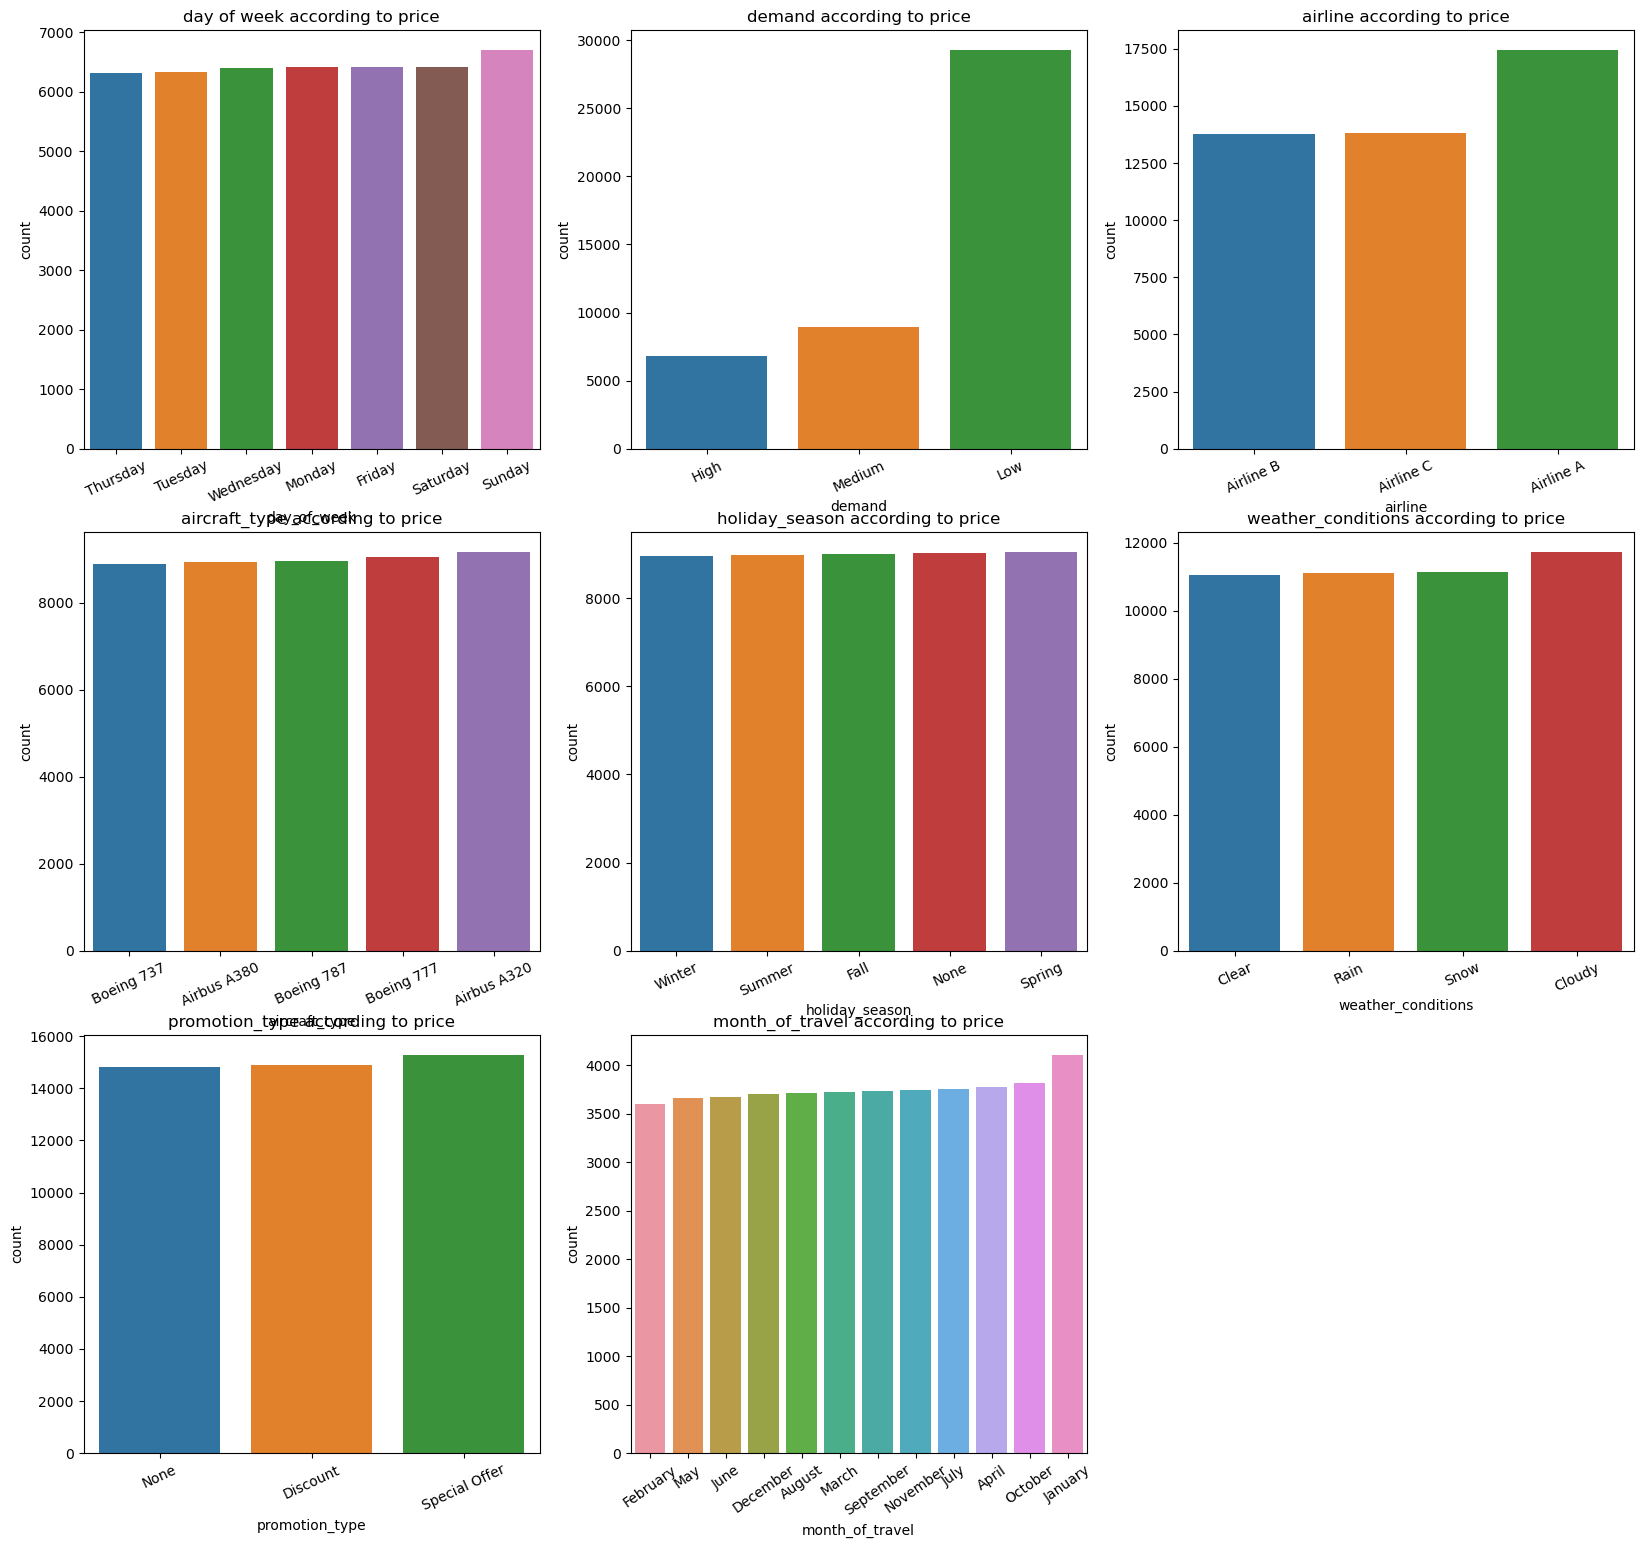

In [43]:
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(x=df['day_of_week'],order=df['day_of_week'].value_counts().index[::-1])
plt.xticks(rotation=25)
plt.xlabel("day_of_week")
plt.title("day of week according to price")

plt.subplot(432)
sns.countplot(x=df['demand'],order=df["demand"].value_counts().index[::-1])
plt.xticks(rotation=25)
plt.title("demand according to price")

plt.subplot(433)
sns.countplot(x=df['airline'],order=df["airline"].value_counts().index[::-1])
plt.xticks(rotation=25)
plt.title("airline according to price")

plt.subplot(434)
sns.countplot(x=df['aircraft_type'],order=df["aircraft_type"].value_counts().index[::-1])
plt.xticks(rotation=25)
plt.title("aircraft_type according to price")

plt.subplot(435)
sns.countplot(x=df['holiday_season'],order=df["holiday_season"].value_counts().index[::-1])
plt.xticks(rotation=25)
plt.title("holiday_season according to price")

plt.subplot(436)
sns.countplot(x=df['weather_conditions'],order=df["weather_conditions"].value_counts().index[::-1])
plt.xticks(rotation=25)
plt.title("weather_conditions according to price")

plt.subplot(437)
sns.countplot(x=df['promotion_type'],order=df["promotion_type"].value_counts().index[::-1])
plt.xticks(rotation=25)
plt.title("promotion_type according to price")

plt.subplot(438)
sns.countplot(x=df['month_of_travel'],order=df["month_of_travel"].value_counts().index[::-1])
plt.xticks(rotation=35)
plt.title("month_of_travel according to price")

<Axes: xlabel='demand', ylabel='flight_price'>

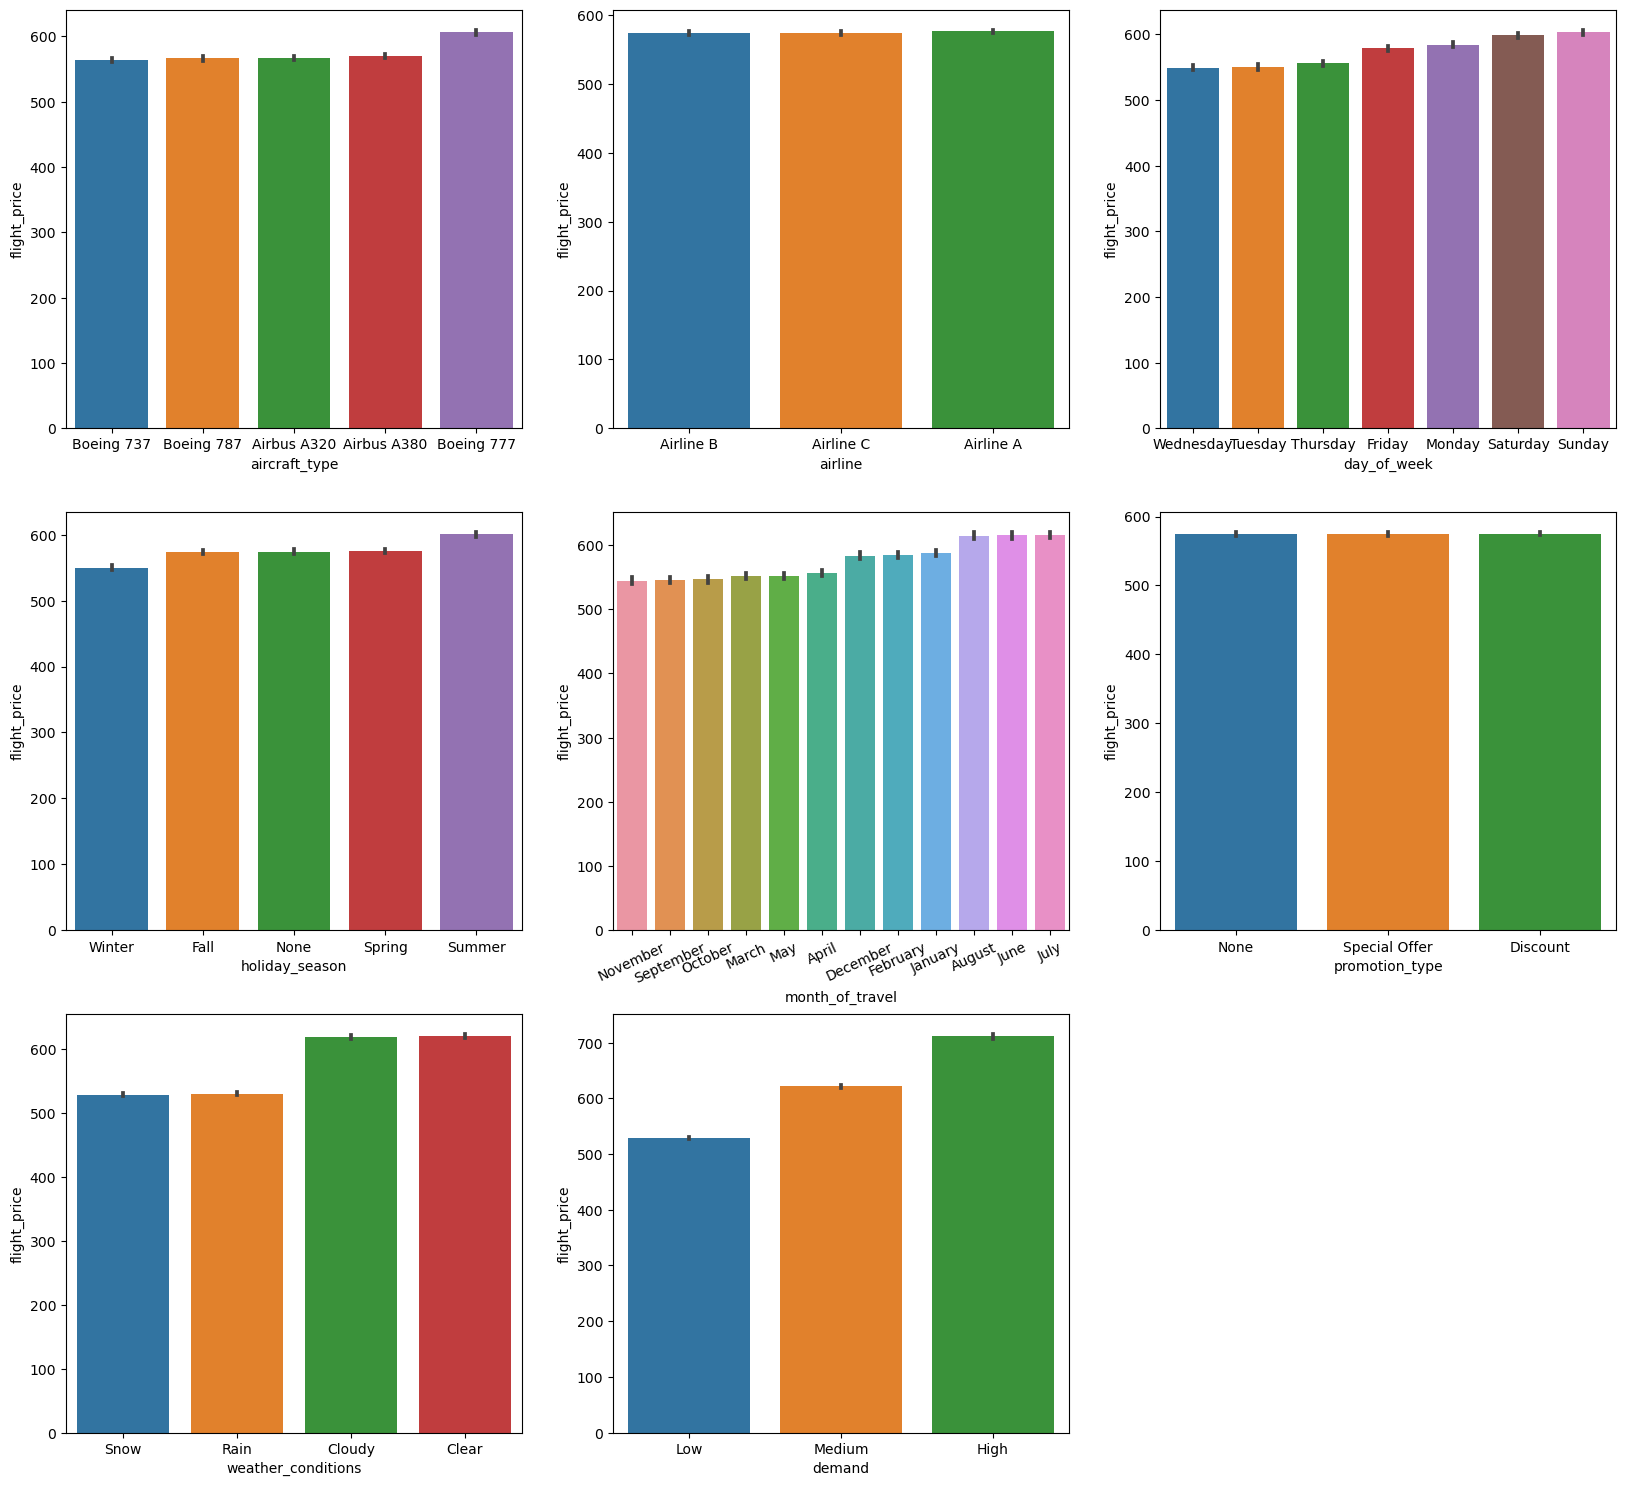

In [44]:
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.barplot(x=df['aircraft_type'],y=df['flight_price'],order=df.groupby("aircraft_type")["flight_price"].mean().reset_index().sort_values("flight_price")["aircraft_type"])

plt.subplot(432)
sns.barplot(x=df['airline'],y=df['flight_price'],order=df.groupby("airline")["flight_price"].mean().reset_index().sort_values("flight_price")["airline"])

plt.subplot(433)
sns.barplot(x=df['day_of_week'],y=df['flight_price'],order=df.groupby("day_of_week")["flight_price"].mean().reset_index().sort_values("flight_price")["day_of_week"])

plt.subplot(434)
sns.barplot(x=df['holiday_season'],y=df['flight_price'],order=df.groupby("holiday_season")["flight_price"].mean().reset_index().sort_values("flight_price")["holiday_season"])

plt.subplot(435)
sns.barplot(x=df['month_of_travel'],y=df['flight_price'],order=df.groupby("month_of_travel")["flight_price"].mean().reset_index().sort_values("flight_price")["month_of_travel"])
plt.xticks(rotation=25)

plt.subplot(436)
sns.barplot(x=df['promotion_type'],y=df['flight_price'],order=df.groupby("promotion_type")["flight_price"].mean().reset_index().sort_values("flight_price")["promotion_type"])

plt.subplot(437)
sns.barplot(x=df['weather_conditions'],y=df['flight_price'],order=df.groupby("weather_conditions")["flight_price"].mean().reset_index().sort_values("flight_price")["weather_conditions"])

plt.subplot(438)
sns.barplot(x=df['demand'],y=df['flight_price'],order=df.groupby("demand")["flight_price"].mean().reset_index().sort_values("flight_price")["demand"])

<Axes: xlabel='fuel_price', ylabel='flight_price'>

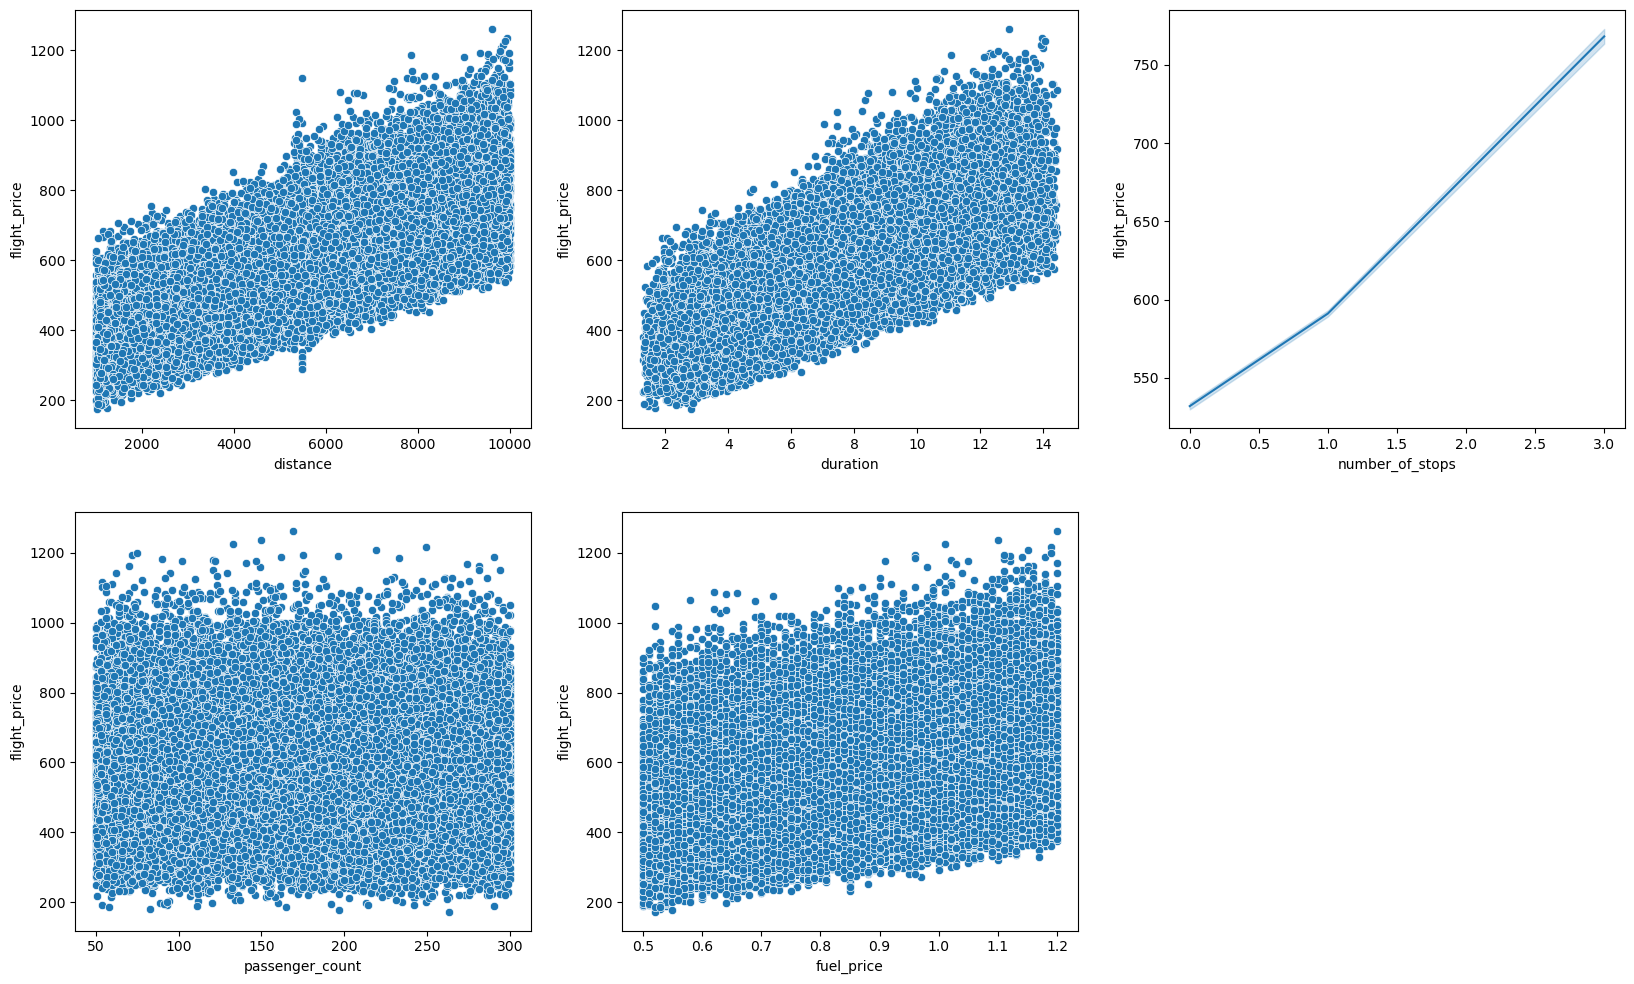

In [45]:
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.scatterplot(x=df['distance'],y=df["flight_price"])

plt.subplot(432)
sns.scatterplot(x=df['duration'],y=df["flight_price"])

plt.subplot(433)
sns.lineplot(x=df['number_of_stops'],y=df["flight_price"])

plt.subplot(434)
sns.scatterplot(x=df['passenger_count'],y=df["flight_price"])

plt.subplot(435)
sns.scatterplot(x=df['fuel_price'],y=df["flight_price"])

In [46]:
df.head()

,flight_id,airline,departure_city,arrival_city,distance,departure_time,arrival_time,duration,aircraft_type,number_of_stops,day_of_week,month_of_travel,holiday_season,demand,weather_conditions,passenger_count,promotion_type,fuel_price,flight_price
0,F1,Airline B,Port Michael,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,F4,Airline A,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35


In [47]:
del df['departure_time']
del df['arrival_time']
del df['departure_city']
del df['arrival_city']
del df['flight_id']
del df['airline']
del df['passenger_count']
del df['promotion_type']

In [48]:
df.head()

,distance,duration,aircraft_type,number_of_stops,day_of_week,month_of_travel,holiday_season,demand,weather_conditions,fuel_price,flight_price
0,8286.0,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,0.91,643.93
1,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,1.08,423.13
2,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,0.52,442.17
3,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,0.71,394.42
4,5558.0,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,1.09,804.35


In [49]:
df['day_of_week']=df['day_of_week'].map({"Wednesday":0,"Tuesday":1,"Thursday":2,"Friday":3,"Monday":4,"Saturday":5,"Sunday":6})
df['month_of_travel']=df['month_of_travel'].map({"November":0,"September":1,"October":2,"March":3,"May":4,"April":5,"December":6,
                                                 "February":7,"January":8,"August":9,"June":10,"July":11})
df['holiday_season']=df['holiday_season'].map({"Winter":0,"Fall":1,"None":2,"Spring":3,"Summer":4})
df['demand']=df['demand'].map({"Low":0,"Medium":1,"High":2})
df["aircraft_type"]=df["aircraft_type"].map({"Boeing 737":0,"Boeing 787":1,"Airbus A320":2,"Airbus A380":3,"Boeing 777":4})

In [50]:
df=pd.get_dummies(df,columns=["weather_conditions"])

In [51]:
df.head()

,distance,duration,aircraft_type,number_of_stops,day_of_week,month_of_travel,holiday_season,demand,fuel_price,flight_price,weather_conditions_Clear,weather_conditions_Cloudy,weather_conditions_Rain,weather_conditions_Snow
0,8286.0,11.94,1,0,0,6,4,0,0.91,643.93,0,0,1,0
1,2942.0,5.29,2,0,0,3,3,0,1.08,423.13,0,0,1,0
2,2468.0,4.41,1,1,6,1,4,2,0.52,442.17,0,1,0,0
3,3145.0,4.96,1,0,6,7,1,0,0.71,394.42,0,1,0,0
4,5558.0,8.09,0,1,2,8,2,0,1.09,804.35,1,0,0,0


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [54]:
X=df.drop("flight_price",axis=1)
y=df['flight_price']

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr_res=np.sqrt(cross_val_score(lr,X_train,y_train,cv=10,scoring=make_scorer(mean_squared_error)).mean())

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)
knn_value=np.arange(1,13)
cross_val_knn=[]
for k in knn_value:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train_scaled,y_train)
  print("K value :",k,"Train_score :",knn_regressor.score(X_train_scaled,y_train),"cross_val_score :",cross_val_score(knn_regressor,X_train_scaled,y_train,cv=10,scoring=make_scorer(mean_squared_error)).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,y_train,cv=10).mean())

In [92]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)
knn_regressor=KNeighborsRegressor(n_neighbors=11)
knn_regressor.fit(X_train,y_train)
knn_res=np.sqrt(cross_val_score(knn_regressor,X_train_scaled,y_train,cv=10,scoring=make_scorer(mean_squared_error)).mean())

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr_range=np.arange(1,20)
for i in dtr_range:
    dtr_reg=DecisionTreeRegressor(max_depth=i)
    dtr_reg.fit(X_train,y_train)
    print("Depth :",i,"train_score :",dtr_reg.score(X_train,y_train),"cross_val_score :",cross_val_score(dtr_reg,X_train,y_train,cv=10,scoring=make_scorer(mean_squared_error)).mean())
    dtr_value.append(cross_val_score(dtr_reg,X_train,y_train,cv=10,scoring=make_scorer(mean_squared_error)).mean())

In [93]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor(max_depth=13)
dr.fit(X_train,y_train)
dr_res=np.sqrt(cross_val_score(dr,X_train,y_train,cv=10,scoring=make_scorer(mean_squared_error)).mean())

In [ ]:
from sklearn.ensemble import RandomForestRegressor
max_depth=np.arange(1,30)
for i in max_depth:
    rf=RandomForestRegressor(max_features="sqrt",max_depth=i)
    rf.fit(X_train,y_train)
    print("depth :",i,"train_score :",rf.score(X_train,y_train),
          "cross_val_score :",np.mean(cross_val_score(rf,X_train,y_train,cv=10,scoring=make_scorer(mean_squared_error))))

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_features="sqrt",max_depth=20)
rf.fit(X_train,y_train)
rf_res=np.sqrt(cross_val_score(rf,X_train,y_train,cv=10,scoring=make_scorer(mean_squared_error)).mean())

In [62]:
import xgboost as xgb

In [75]:
for lr in [1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19]:
    xgb_regressor=xgb.XGBRFRegressor(learning_rate=lr,n_estimators=100)
    xgb_regressor.fit(X_train,y_train)
    print("learning_rate",lr,"score",
          np.sqrt(cross_val_score(xgb_regressor,X_train,y_train,cv=10,scoring=make_scorer(mean_squared_error)).mean()))
    

learning_rate 1.11 score 48.7381326016367
learning_rate 1.12 score 49.078904242504294
learning_rate 1.13 score 49.46092943292186
learning_rate 1.14 score 49.88325808096234
learning_rate 1.15 score 50.344880158366706
learning_rate 1.16 score 50.84472445395398
learning_rate 1.17 score 51.381672822167445
learning_rate 1.18 score 51.954590980991036
learning_rate 1.19 score 52.56228018725286


In [90]:
xgb_regressor=xgb.XGBRFRegressor(learning_rate=1.1,n_estimators=100)
xgb_regressor.fit(X_train,y_train)
xgb_res=np.sqrt(cross_val_score(xgb_regressor,X_train,y_train,cv=10,scoring=make_scorer(mean_squared_error)).mean())

In [95]:
print("linear_regressor :",lr_res)
print("knn_regressor :",knn_res)
print("decision tree :",dr_res)
print("random forest :",rf_res)
print("XGboost :",xgb_res)

linear_regressor : 25.03925256927479
knn_regressor : 28.08845758664841
decision tree : 28.487571801420813
random forest : 21.607476729464143
XGboost : 48.43948800218783


In [96]:
print("good model is random forest:",rf_res)

good model is random forest: 21.607476729464143


In [97]:
rf.feature_importances_

array([0.3076641 , 0.28515418, 0.00880243, 0.05185359, 0.01584227,
       0.03008877, 0.00720766, 0.14223353, 0.11721889, 0.00879674,
       0.00777371, 0.00851577, 0.00884834])

In [98]:
sorted_idx=rf.feature_importances_.argsort()

Text(0, 0.5, 'feature importance')

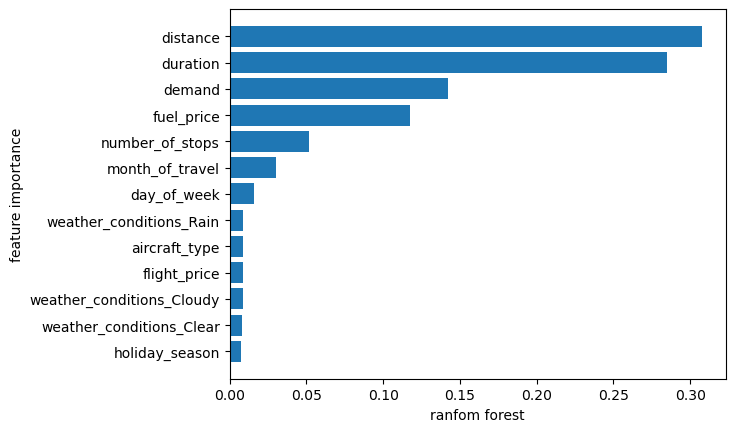

In [100]:
plt.barh(df.columns[sorted_idx],rf.feature_importances_[sorted_idx])
plt.xlabel("ranfom forest")
plt.ylabel("feature importance")